<a href="https://colab.research.google.com/github/anirudhr20/Brain-Tumor-Detection-Using-Faster-RCNN/blob/master/brainfaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive"


Mounted at /content/gdrive


In [0]:
PATH_OF_DATA= '/content/gdrive/"My Drive"/Tumor'
!ls {PATH_OF_DATA}

ls: cannot access '/content/gdrive/My Drive/Tumor': No such file or directory


In [0]:
import torch
import numpy as np
import torchvision.transforms as transforms
from torchvision import datasets
import os
import shutil

In [0]:
data_transforms = transforms.Compose([transforms.Resize((128,128)),transforms.ToTensor()])

In [0]:
from torchvision import transforms

# Image transformations
image_transforms = {
    # Train uses data augmentation
    'train':
    transforms.Compose([
        transforms.RandomResizedCrop(size=128, scale=(0.8, 1.0)),
        transforms.RandomRotation(degrees=15),
        transforms.ColorJitter(),
        transforms.RandomHorizontalFlip(),
        transforms.CenterCrop(size=128),  # Image net standards
        transforms.ToTensor()
        
    ]),
    # Validation does not use augmentation
    'valid':
    transforms.Compose([
        transforms.Resize(size=128),
        transforms.CenterCrop(size=128),
        transforms.ToTensor()
        
    ]),
}

In [0]:
from torchvision import datasets
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler

# Datasets from folders
data = {
    'train':
    datasets.ImageFolder(root='/content/gdrive/My Drive/Tumor/training_set', transform=image_transforms['train']),
    'valid':
    datasets.ImageFolder(root='/content/gdrive/My Drive/Tumor/validation_set', transform=image_transforms['valid'])
}

test_data = datasets.ImageFolder(root='/content/gdrive/My Drive/Tumor/test_set', transform=data_transforms)
num_train = len(data['train'])
valid_size = 0.2
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)
# Dataloader iterators, make sure to shuffle
dataloaders = {
    'train': DataLoader(data['train'], batch_size=32,sampler=train_sampler, num_workers=0),
    'val': DataLoader(data['valid'], batch_size=32,sampler=train_sampler, num_workers=0)

}
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32, 
    num_workers=0)

In [0]:
trainiter = iter(dataloaders['train'])
features, labels = next(trainiter)
features.shape, labels.shape

(torch.Size([32, 3, 128, 128]), torch.Size([32]))

In [0]:
img_path = '/content/gdrive/"My Drive"/Tumor/tes'
!ls {img_path}

ls: cannot access '/content/gdrive/My Drive/Tumor/tes': No such file or directory


In [0]:
IMG_PATH = '/content/gdrive/My Drive/Tumor/training_set/'
# split the data by train/val/test

for CLASS in os.listdir(IMG_PATH):
    if not CLASS.startswith('.'):
        IMG_NUM = len(os.listdir(IMG_PATH + CLASS))
        for (n, FILE_NAME) in enumerate(os.listdir(IMG_PATH + CLASS)):
            img = IMG_PATH +CLASS + '/' + FILE_NAME

In [0]:
import torchvision
import PIL

transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize((128,128)),
    torchvision.transforms.ColorJitter(hue=.05, saturation=.05),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.RandomRotation(20, resample=PIL.Image.BILINEAR)
])



train_data = datasets.ImageFolder(root='/content/gdrive/My Drive/Tumor/training_set', transform=transforms)
test_data = datasets.ImageFolder(root='/content/gdrive/My Drive/Tumor/test_set', transform=data_transforms)
val_data = datasets.ImageFolder(root='/content/gdrive/My Drive/Tumor/validation_set', transform=data_transforms)

In [0]:
from torch.utils.data.sampler import SubsetRandomSampler

In [0]:
num_train = len(train_data)
valid_size = 0.2
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)
num_train

140

In [0]:

num_workers=0

train_loader = torch.utils.data.DataLoader(train_data, batch_size=32,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(val_data, batch_size=32, 
    sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32, 
    num_workers=num_workers)


import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['axes.grid'] = False
mpl.rcParams['image.interpolation'] = 'nearest'
mpl.rcParams['figure.figsize'] = 15, 25

def show_dataset(dataset, n=6):
  img = np.vstack((np.hstack((np.asarray(dataset[i][0]) for _ in range(n)))
                   for i in range(6)))
  plt.imshow(img)
  plt.axis('off')

In [0]:
show_dataset(train_data)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


TypeError: ignored

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

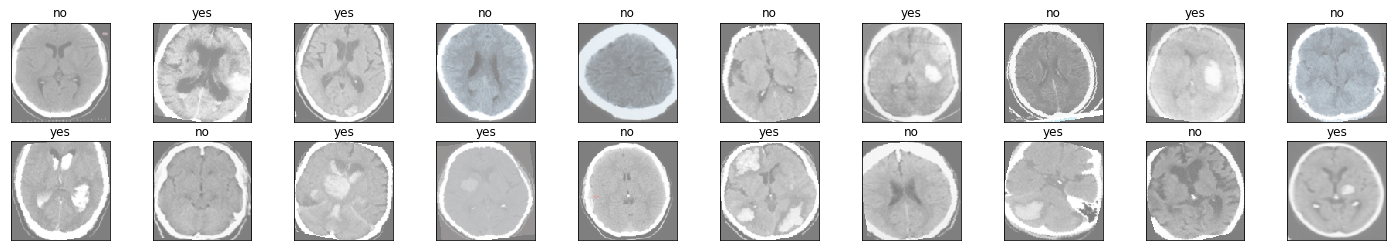

In [0]:
classes = ['no','yes']
dataiter = iter(dataloaders['train'])

images, labels = dataiter.next()
labels.shape
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])

In [0]:
len(dataloaders['test'])

1

In [0]:
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    
    # sees image as 128*128*3
    self.conv1 = nn.Conv2d(3,20,3,padding=1)
    # sees image as 64*64*20
    self.conv2 = nn.Conv2d(20,10,3,padding=1)
    # sees image as 32*32*10
    self.pool = nn.MaxPool2d(2, 2)
    
    self.fc1 = nn.Linear(32*32*10,500)
    
    self.fc2 = nn.Linear(500,2)
   
  def forward(self, x):
        
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        
        # flatten image input
        x = x.view(-1, 32*32*10)
        x = F.relu(self.fc1(x))
        x = F.softmax(self.fc2(x))
        return x

In [0]:
model=Model()
import torch.optim as optim

# specify loss function
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [0]:
# number of epochs to train the model
n_epochs = 100 # you may increase this number to train a final model

valid_loss_min = np.Inf # track change in validation loss

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    

    model.train()
    for data, target in dataloaders['train']:
       
        
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        
   
    
    # calculate average losses
    train_loss = train_loss/len(dataloaders['train'].dataset)
    # valid_loss = valid_loss/len(valid_loader.dataset)
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch, train_loss))
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 1 	Training Loss: 0.554940
Epoch: 2 	Training Loss: 0.554389
Epoch: 3 	Training Loss: 0.553956
Epoch: 4 	Training Loss: 0.553476
Epoch: 5 	Training Loss: 0.552513
Epoch: 6 	Training Loss: 0.552149
Epoch: 7 	Training Loss: 0.551906
Epoch: 8 	Training Loss: 0.551224
Epoch: 9 	Training Loss: 0.551044
Epoch: 10 	Training Loss: 0.549824
Epoch: 11 	Training Loss: 0.549660
Epoch: 12 	Training Loss: 0.547544
Epoch: 13 	Training Loss: 0.547919
Epoch: 14 	Training Loss: 0.547773
Epoch: 15 	Training Loss: 0.546217
Epoch: 16 	Training Loss: 0.545586
Epoch: 17 	Training Loss: 0.545627
Epoch: 18 	Training Loss: 0.544914
Epoch: 19 	Training Loss: 0.543739
Epoch: 20 	Training Loss: 0.540823
Epoch: 21 	Training Loss: 0.541294
Epoch: 22 	Training Loss: 0.539696
Epoch: 23 	Training Loss: 0.539436
Epoch: 24 	Training Loss: 0.536280
Epoch: 25 	Training Loss: 0.535522
Epoch: 26 	Training Loss: 0.533784
Epoch: 27 	Training Loss: 0.533789
Epoch: 28 	Training Loss: 0.530938
Epoch: 29 	Training Loss: 0.5

In [0]:

# track test loss
test_loss = 0.0
class_correct = list(0. for i in range(2))
class_total = list(0. for i in range(2))
batch_size = 20

model.eval()
# iterate over test data
for data, target in test_loader:
    # move tensors to GPU if CUDA is available

    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) 
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# average test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(2):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.633095

Test Accuracy of    no: 90% ( 9/10)
Test Accuracy of   yes: 50% ( 5/10)

Test Accuracy (Overall): 70% (14/20)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


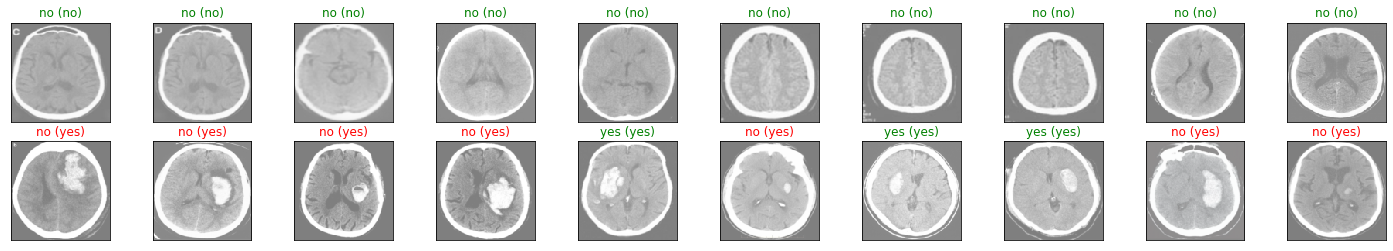

In [0]:
dataiter = iter(test_loader)
images, labels = dataiter.next()
images.numpy()

# move model inputs to cuda, if GPU available


# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy()) 

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx].item() else "red"))

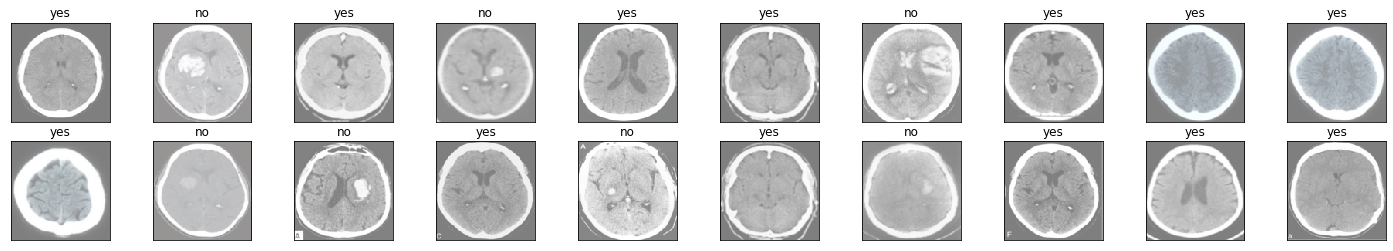

In [0]:
classes = ['yes','no']
dataiter = iter(train_loader)

images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])

In [0]:
len(train_data)

140

In [0]:
get_model(2)


FasterRCNN(
  (transform): GeneralizedRCNNTransform()
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(original_name=FrozenBatchNorm2d)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(original_name=FrozenBatchNorm2d)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(original_name=FrozenBatchNorm2d)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(original_name=FrozenBatchNorm2d)
          (relu): ReLU(inplace=True)
          (downsample): Sequential(
       

In [0]:
import torchvision.transforms as T

def get_transform(train):
    transforms = []
    transforms.append(T.ToTensor())
    if train:
        transforms.append(T.RandomHorizontalFlip(0.5))
    return T.Compose(transforms)

In [0]:

model

NameError: ignored

In [0]:
# should change mask to faster rcnN

import math
import sys
import time
import torch

import torchvision.models.detection.mask_rcnn

from coco_utils import get_coco_api_from_dataset
from coco_eval import CocoEvaluator
import utils


def train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq):
    model.train()
    metric_logger = utils.MetricLogger(delimiter="  ")
    metric_logger.add_meter('lr', utils.SmoothedValue(window_size=1, fmt='{value:.6f}'))
    header = 'Epoch: [{}]'.format(epoch)

    lr_scheduler = None
    if epoch == 0:
        warmup_factor = 1. / 1000
        warmup_iters = min(1000, len(data_loader) - 1)

        lr_scheduler = utils.warmup_lr_scheduler(optimizer, warmup_iters, warmup_factor)

    for images, targets in metric_logger.log_every(data_loader, print_freq, header):
        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        loss_dict = model(images, targets)

        losses = sum(loss for loss in loss_dict.values())

        # reduce losses over all GPUs for logging purposes
        loss_dict_reduced = utils.reduce_dict(loss_dict)
        losses_reduced = sum(loss for loss in loss_dict_reduced.values())

        loss_value = losses_reduced.item()

        if not math.isfinite(loss_value):
            print("Loss is {}, stopping training".format(loss_value))
            print(loss_dict_reduced)
            sys.exit(1)

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        if lr_scheduler is not None:
            lr_scheduler.step()

        metric_logger.update(loss=losses_reduced, **loss_dict_reduced)
        metric_logger.update(lr=optimizer.param_groups[0]["lr"])


def _get_iou_types(model):
    model_without_ddp = model
    if isinstance(model, torch.nn.parallel.DistributedDataParallel):
        model_without_ddp = model.module
    iou_types = ["bbox"]
    if isinstance(model_without_ddp, torchvision.models.detection.MaskRCNN):
        iou_types.append("segm")
    if isinstance(model_without_ddp, torchvision.models.detection.KeypointRCNN):
        iou_types.append("keypoints")
    return iou_types


@torch.no_grad()
def evaluate(model, data_loader, device):
    n_threads = torch.get_num_threads()
    # FIXME remove this and make paste_masks_in_image run on the GPU
    torch.set_num_threads(1)
    cpu_device = torch.device("cpu")
    model.eval()
    metric_logger = utils.MetricLogger(delimiter="  ")
    header = 'Test:'

    coco = get_coco_api_from_dataset(data_loader.dataset)
    iou_types = _get_iou_types(model)
    coco_evaluator = CocoEvaluator(coco, iou_types)

    for image, targets in metric_logger.log_every(data_loader, 100, header):
        image = list(img.to(device) for img in image)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        torch.cuda.synchronize()
        model_time = time.time()
        outputs = model(image)

        outputs = [{k: v.to(cpu_device) for k, v in t.items()} for t in outputs]
        model_time = time.time() - model_time

        res = {target["image_id"].item(): output for target, output in zip(targets, outputs)}
        evaluator_time = time.time()
        coco_evaluator.update(res)
        evaluator_time = time.time() - evaluator_time
        metric_logger.update(model_time=model_time, evaluator_time=evaluator_time)

    # gather the stats from all processes
    metric_logger.synchronize_between_processes()
    print("Averaged stats:", metric_logger)
    coco_evaluator.synchronize_between_processes()

    # accumulate predictions from all images
    coco_evaluator.accumulate()
    coco_evaluator.summarize()
    torch.set_num_threads(n_threads)
    return coco_evaluator

ModuleNotFoundError: ignored

In [0]:

def main():

   device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
   print('hello')
   num_class=2
   model=get_model(num_classes)
   model.to(device)
   params = [p for p in model.parameters() if p.requires_grad]
   optimizer = torch.optim.SGD(params, lr=0.005,
                                momentum=0.9, weight_decay=0.0005)
   print(2)
   lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,
                                                   step_size=3,
                                                   gamma=0.1)
   num_epochs = 2

   for epoch in range(num_epochs):
  

     print(2)
     train(model, optimizer, data_loader, device, epoch, print_freq=10)
        # change it to train_one_epoch
     lr_scheduler.step()
     evaluate(model, data_loader_test, device=device)


In [0]:
main()

hello


NameError: ignored

In [0]:
import gluoncv
from gluoncv import model_zoo, data, utils

In [0]:
!pip install --upgrade mxnet gluoncv

     |████████████████████████████████| 25.4MB 91kB/s 
     |████████████████████████████████| 512kB 48.6MB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [0]:
net = model_zoo.get_model('faster_rcnn_resnet50_v1b_voc', pretrained=True)

Model file is not found. Downloading.


121888KB [00:02, 42459.99KB/s]                            


In [0]:
from engine import train_one_epoch, evaluate
import utils

ModuleNotFoundError: ignored

In [0]:
!pip install pyttsx3

In [0]:
!git clone https://github.com/cocodataset/cocoapi
!cd cocoapi/PythonAPI
!python setup.py build_ext install

fatal: destination path 'cocoapi' already exists and is not an empty directory.
python3: can't open file 'setup.py': [Errno 2] No such file or directory


In [0]:
!pip install coco_utils

ERROR: Could not find a version that satisfies the requirement coco_utils (from versions: none)
ERROR: No matching distribution found for coco_utils


In [0]:

!cd cocoapi/PythonAPI
!python3 setup.py build_ext install

python3: can't open file 'setup.py': [Errno 2] No such file or directory


In [0]:
import torchvision.models as models

In [0]:
import torchvision.models as models

In [0]:
smodel = models.detection.fasterrcnn_resnet50_fpn(pretrained=True,progress=True)

In [0]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

In [0]:
predictions = smodel(images[0])

ValueError: ignored

In [0]:
test_data

Dataset ImageFolder
    Number of datapoints: 20
    Root location: /content/gdrive/My Drive/Tumor/test_set
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=PIL.Image.BILINEAR)
               ToTensor()
           )